# Exploratory Data Analysis and Model Building - Adult-Income-Dataset
Data Description :

An individual’s annual income results from various factors. Intuitively, it is influenced by the individual’s education level, age, gender, occupation

Kaggle URL to Download Dataset: https://www.kaggle.com/datasets/wenruliu/adult-income-dataset

What is a Term Adult?

An adult is a mature, fully developed person. Adult has reached the age when they are legally responsible for their actions.



# 1. Importing the libraries 


In [1]:
# Importing the libraries 

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

# Ignore harmless warnings 

import warnings 
warnings.filterwarnings("ignore")

# Set to display all the columns in dataset

pd.set_option("display.max_columns", None)

# Import psql to run queries 

import pandasql as psql

import seaborn as sns

# 2. Reading the Adult-Income data

In [73]:
adult_inc = pd.read_csv(r"C:\Users\Rashee\Downloads\adult2.csv", encoding="ISO-8859-1", header=0)
adult_inc_bk = pd.read_csv(r"C:\Users\Rashee\Downloads\adult2.csv", encoding="ISO-8859-1", header=0)
adult_inc.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


# 3. Shape of Adult-income data


In [3]:
adult_inc.shape

(48842, 15)

# Display the Adult-Income dataset information

In [4]:
adult_inc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [5]:
#Renaming columns

adult_inc.rename({"education-num":"educational_num","marital-status":"marital-status","sex":"gender","capital-gain":"capital_gain","capital-loss":"capital_loss",
         "hours-per-week":"hours_per_week","native-country":"native_country"},axis=1,inplace=True)

# Data Cleaning

In [6]:
#Finding the special characters in the data frame 
adult_inc.isin(['?']).sum(axis=0)


age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital_gain          0
capital_loss          0
hours_per_week        0
native_country      857
income                0
dtype: int64

In [7]:
cols=['workclass1','occupation','native_country']

In [8]:
adult_inc['workclass1']=adult_inc['workclass'].replace('?',adult_inc['workclass'].mode()[0])
del adult_inc['workclass']

In [9]:
#Filling missing values using SimpleImputer

from sklearn.impute import SimpleImputer

imputer_si = SimpleImputer(missing_values=np.nan,strategy='most_frequent')
for i in cols:
    adult_inc[i] = imputer_si.fit_transform(adult_inc[[i]])

In [11]:
adult_inc['occupation']=adult_inc['occupation'].replace('?',adult_inc['occupation'].mode()[0])
adult_inc['native_country']=adult_inc['native_country'].replace('?',adult_inc['native_country'].mode()[0])

In [12]:
#checking the special characters in the data frame 
adult_inc.isin(['?']).sum(axis=0)

age                0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital_gain       0
capital_loss       0
hours_per_week     0
native_country     0
income             0
workclass1         0
dtype: int64

# Find Missing Values


In [13]:
adult_inc.isnull().sum()

age                0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital_gain       0
capital_loss       0
hours_per_week     0
native_country     0
income             0
workclass1         0
dtype: int64

# Find Features with One Value

In [14]:
adult_inc.nunique()

age                   74
fnlwgt             28523
education             16
educational-num       16
marital-status         7
occupation            14
relationship           6
race                   5
gender                 2
capital_gain         123
capital_loss          99
hours_per_week        96
native_country        41
income                 2
workclass1             8
dtype: int64

# Check the Data set is balanced or not based on target values in classification

In [15]:
 adult_inc['income'].value_counts()

<=50K    37155
>50K     11687
Name: income, dtype: int64

In [16]:
# Count the target or dependent variable by '0', '1' & their proportion (>= 10 : 1, then the dataset is imbalance dataset)

class_count = adult_inc['income'].value_counts()
print('Class 0:', class_count[0])
print('Class 1:', class_count[1])
print('Proportion:', round(class_count[0] / class_count[1], 2), ': 1')
print('Total  Records:', len(adult_inc))

Class 0: 37155
Class 1: 11687
Proportion: 3.18 : 1
Total  Records: 48842


# Explore the Categorical Features

In [17]:
categorical_features=[feature for feature in adult_inc.columns if ((adult_inc[feature].dtypes=='O') & (feature not in ['income']))]
categorical_features

['education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'gender',
 'native_country',
 'workclass1']

In [18]:
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(adult_inc[feature].unique())))


The feature is education and number of categories are 16
The feature is marital-status and number of categories are 7
The feature is occupation and number of categories are 14
The feature is relationship and number of categories are 6
The feature is race and number of categories are 5
The feature is gender and number of categories are 2
The feature is native_country and number of categories are 41
The feature is workclass1 and number of categories are 8


# Find Categorical Feature Distribution

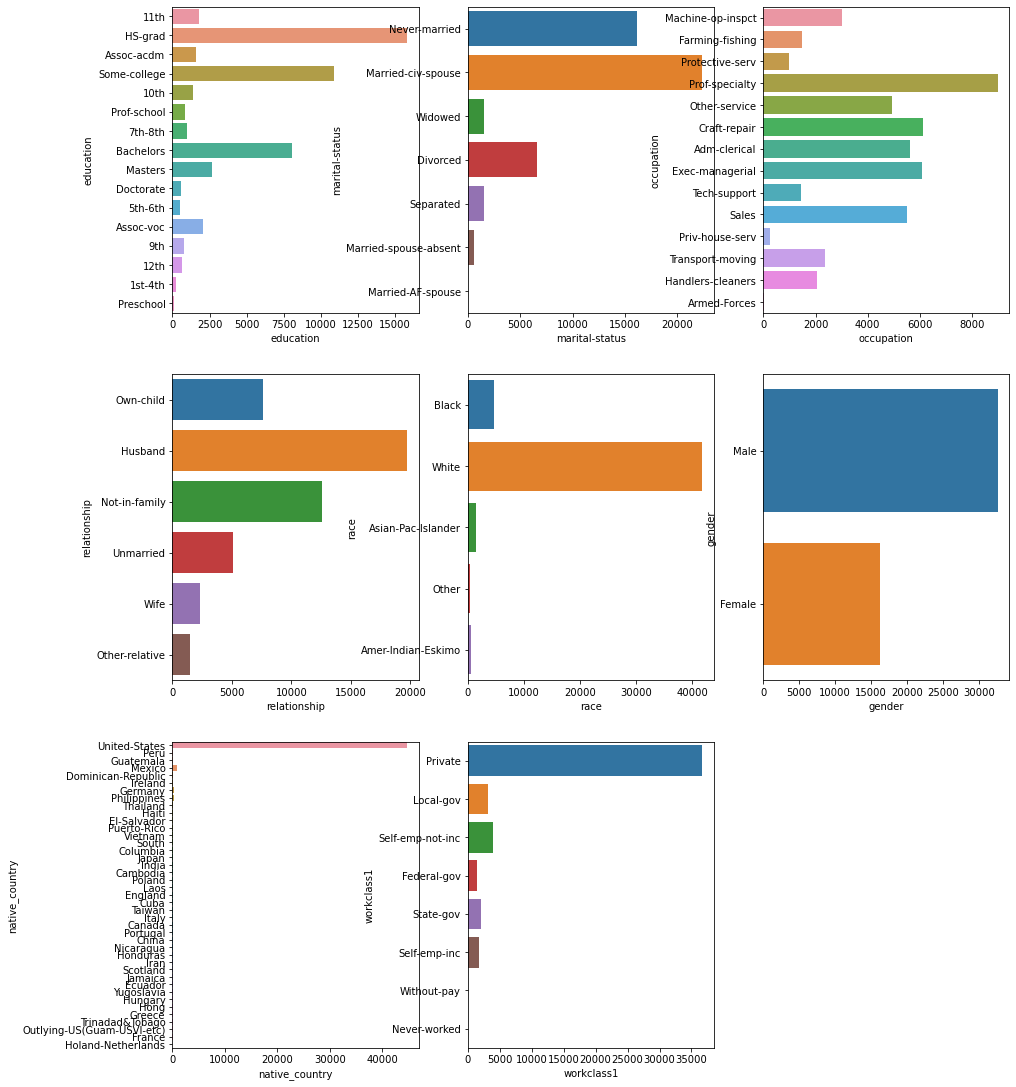

In [19]:
plt.figure(figsize=(15,80),facecolor='white')
plotnumber=1
for categorical_feature in categorical_features:
    ax=plt.subplot(12,3,plotnumber)
    sns.countplot(y=categorical_feature,data=adult_inc)
    plt.xlabel(categorical_feature)
    plt.ylabel(categorical_feature)
    plotnumber+=1
plt.show()

# Explore the Correlation between numerical features

In [20]:
adult_inc.corr()

,age,fnlwgt,educational-num,capital_gain,capital_loss,hours_per_week
age,1.000000,-0.076628,0.030940,0.077229,0.056944,0.071558
fnlwgt,-0.076628,1.000000,-0.038761,-0.003706,-0.004366,-0.013519
educational-num,0.030940,-0.038761,1.000000,0.125146,0.080972,0.143689
capital_gain,0.077229,-0.003706,0.125146,1.000000,-0.031441,0.082157
capital_loss,0.056944,-0.004366,0.080972,-0.031441,1.000000,0.054467
hours_per_week,0.071558,-0.013519,0.143689,0.082157,0.054467,1.000000


<AxesSubplot:>

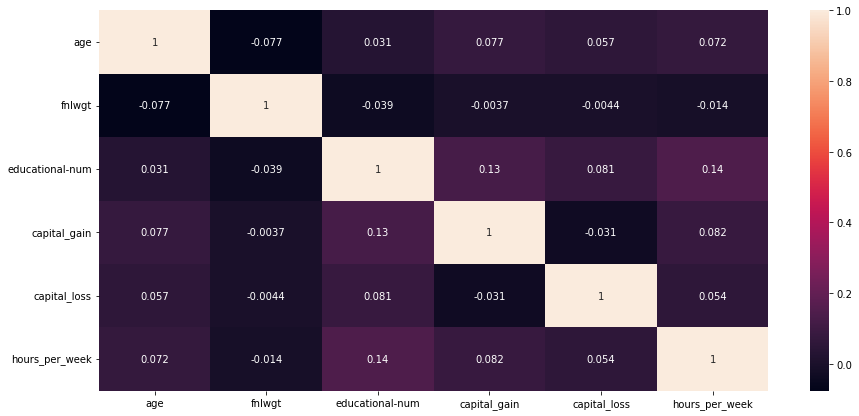

In [21]:
## Checking for correlation
cor_mat=adult_inc.corr()
fig = plt.figure(figsize=(15,7))
sns.heatmap(cor_mat,annot=True)

In [22]:
# Use LabelEncoder to handle categorical data

from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()
for i in adult_inc.columns:
    if adult_inc[i].dtype=='object':
        adult_inc[i] = LE.fit_transform(adult_inc[[i]])

In [23]:
adult_inc.head()

,age,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,income,workclass1
0,25,226802,1,7,4,6,3,2,1,0,0,40,38,0,3
1,38,89814,11,9,2,4,0,4,1,0,0,50,38,0,3
2,28,336951,7,12,2,10,0,4,1,0,0,40,38,1,1
3,44,160323,15,10,2,6,0,2,1,7688,0,40,38,1,3
4,18,103497,15,10,4,9,3,4,0,0,0,30,38,0,3


In [24]:
# Display the retail dataset information
adult_inc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   age              48842 non-null  int64
 1   fnlwgt           48842 non-null  int64
 2   education        48842 non-null  int32
 3   educational-num  48842 non-null  int64
 4   marital-status   48842 non-null  int32
 5   occupation       48842 non-null  int32
 6   relationship     48842 non-null  int32
 7   race             48842 non-null  int32
 8   gender           48842 non-null  int32
 9   capital_gain     48842 non-null  int64
 10  capital_loss     48842 non-null  int64
 11  hours_per_week   48842 non-null  int64
 12  native_country   48842 non-null  int32
 13  income           48842 non-null  int32
 14  workclass1       48842 non-null  int32
dtypes: int32(9), int64(6)
memory usage: 3.9 MB


In [25]:
adult_inc_dup=adult_inc[adult_inc.duplicated(keep='last')]
adult_inc_dup

,age,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,income,workclass1
488,24,194630,9,13,4,9,1,4,1,0,0,35,38,0,3
1319,37,52870,9,13,2,3,0,4,1,0,0,40,38,0,3
1668,19,130431,4,3,4,4,1,4,1,0,0,36,25,0,3
1854,22,137876,15,10,4,10,1,4,1,0,0,20,38,0,3
1863,20,203353,15,10,4,9,3,4,0,0,0,40,38,0,3
3900,18,378036,2,8,4,4,3,4,1,0,0,10,38,0,4
4152,17,153021,2,8,4,11,3,4,0,0,0,20,38,0,3
4858,22,157332,15,10,4,9,3,4,0,0,0,40,38,0,3
5078,29,41281,9,13,3,9,1,4,1,0,0,50,38,0,3
5782,21,301694,11,9,4,2,1,4,1,0,0,35,25,0,3


In [26]:
# Remove the identified duplicate records 

adult_inc = adult_inc.drop_duplicates()

<AxesSubplot:xlabel='hours_per_week'>

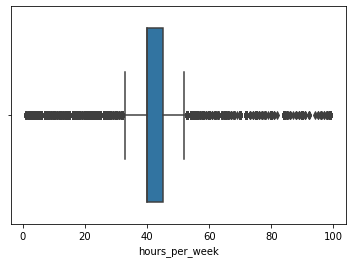

In [27]:
import seaborn as sns
sns.boxplot(adult_inc['hours_per_week'])

In [28]:
#removing outliers from hours-per-week

def remove_outlier_hours_per_week(income):
    IQR=adult_inc['hours_per_week'].quantile(0.75)-adult_inc['hours_per_week'].quantile(0.25)
    lower_range=adult_inc['hours_per_week'].quantile(0.25)-(1.5*IQR)
    upper_range=adult_inc['hours_per_week'].quantile(0.75)+(1.5*IQR)
    
    adult_inc.loc[adult_inc['hours_per_week']<=lower_range,'hours_per_week']=lower_range
    adult_inc.loc[adult_inc['hours_per_week']>=upper_range,'hours_per_week']=upper_range

In [29]:
remove_outlier_hours_per_week(adult_inc)

<AxesSubplot:xlabel='hours_per_week'>

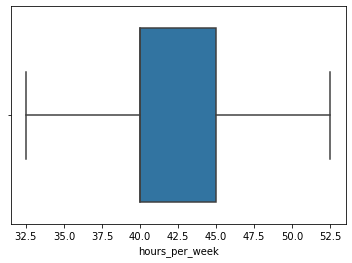

In [30]:
sns.boxplot(adult_inc['hours_per_week'])

<AxesSubplot:xlabel='capital_loss'>

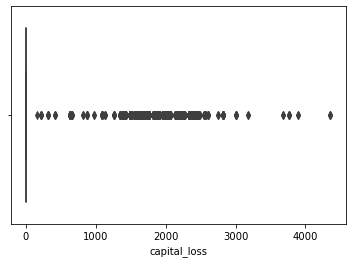

In [31]:
sns.boxplot(adult_inc['capital_loss'])

In [32]:
#removing outliers from capital-loss

def remove_outlier_capital_loss(adult_inc):
    IQR=adult_inc['capital_loss'].quantile(0.75)-adult_inc['capital_loss'].quantile(0.25)
    lower_range=adult_inc['capital_loss'].quantile(0.25)-(1.5*IQR)
    upper_range=adult_inc['capital_loss'].quantile(0.75)+(1.5*IQR)
    
    adult_inc.loc[adult_inc['capital_loss']<=lower_range,'capital_loss']=lower_range
    adult_inc.loc[adult_inc['capital_loss']>=upper_range,'capital_loss']=upper_range

In [33]:
remove_outlier_capital_loss(adult_inc)

<AxesSubplot:xlabel='capital_loss'>

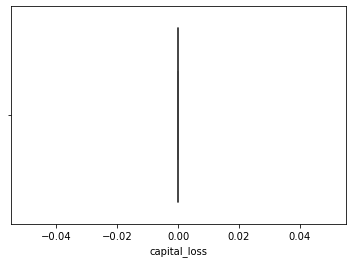

In [34]:
sns.boxplot(adult_inc['capital_loss'])

In [35]:
# Identify the independent and Target (dependent) variables

IndepVar = []
for col in adult_inc.columns:
    if col != 'income':
        IndepVar.append(col)

TargetVar = 'income'

x = adult_inc[IndepVar]
y = adult_inc[TargetVar]

In [36]:
x=x.drop(['workclass1','education','race','gender','capital_loss','native_country'],axis=1)

In [37]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)

In [38]:
ros.fit(x, y)

RandomOverSampler(random_state=42)

In [39]:
x,y = ros.fit_resample(x, y)

# Split Dataset into Training set and Test set

In [40]:
# Splitting the dataset into train and test 

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 42)

# Display the shape 

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((59372, 8), (14844, 8), (59372,), (14844,))

In [41]:
# Scaling the features by using MinMaxScaler

from sklearn.preprocessing import StandardScaler

mmscaler = StandardScaler()
for i in x_train.columns:
    x_train[i]= mmscaler.fit_transform(x_train[i].values.reshape(-1,1))
    x_train [i]= pd.DataFrame(x_train[i])
for i in x_test.columns:
    x_test[i] = mmscaler.fit_transform(x_test[i].values.reshape(-1,1))
    x_test[i] = pd.DataFrame(x_test[i])

In [42]:
x_train.sample(20)

,age,fnlwgt,educational-num,marital-status,occupation,relationship,capital_gain,hours_per_week
40850,-0.200246,0.155920,-1.381076,-0.322108,-1.567110,2.342573,-0.198444,-1.548501
30720,-1.201319,-1.236603,0.918170,1.166100,-0.810038,1.112221,-0.198444,-0.354844
63786,-0.277251,2.004776,0.918170,-0.322108,-1.567110,-0.733306,-0.198444,-0.354844
51755,-0.277251,0.770202,-0.231453,-0.322108,-0.810038,-0.733306,-0.198444,-0.354844
118,0.261788,-0.087433,-0.614661,0.421996,-1.567110,1.727397,-0.198444,-0.354844
67725,0.107777,-1.059831,-0.231453,-1.810316,-0.810038,1.727397,-0.198444,1.634584
55791,-0.046234,-0.246507,-0.231453,-0.322108,1.461181,-0.733306,-0.198444,1.634584
27981,0.261788,-0.169976,0.918170,-0.322108,0.704108,-0.733306,-0.198444,-0.354844
54194,-0.662280,0.231020,-0.231453,-1.810316,-1.062395,1.112221,-0.198444,-0.354844
62049,0.877834,1.922118,-0.231453,-0.322108,-1.567110,2.342573,-0.198444,-1.150615


In [43]:
CSResults =pd.read_csv(r"C:\Users\Rashee\Downloads\HTResults1.csv",header=0)
CSResults.head()

,Model Name,True Positive,False Negative,False Positive,True Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy


# Comparing All Models

In [44]:
CSResults= pd.DataFrame({'Model Name' :[],
               'True_Positive' : [], 
               'False_Negative' : [], 
               'False_Positive' : [],
               'True_Negative' : [],
               'Accuracy' : [],
               'Precision' : [],
               'Recall' : [],
               'F1 Score' : [],
               'Specificity' : [],
               'MCC':[],
               'ROC_AUC_Score':[],
               'Balanced Accuracy':[]})

Model Name:  LogisticRegression()
Confusion matrix : 
 [[5602 1807]
 [1810 5625]]
Outcome values : 
 5602 1807 1810 5625
Classification report : 
               precision    recall  f1-score   support

           1       0.76      0.76      0.76      7409
           0       0.76      0.76      0.76      7435

    accuracy                           0.76     14844
   macro avg       0.76      0.76      0.76     14844
weighted avg       0.76      0.76      0.76     14844

Accuracy : 75.6 %
Precision : 75.6 %
Recall : 75.6 %
F1 Score : 0.756
Specificity or True Negative Rate : 75.7 %
Balanced Accuracy : 75.6 %
MCC : 0.513
roc_auc_score: 0.756


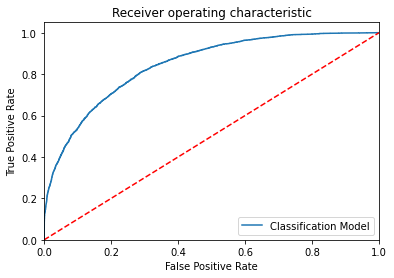

-----------------------------------------------------------------------------------------------------
Model Name:  DecisionTreeClassifier()
Confusion matrix : 
 [[6768  641]
 [1092 6343]]
Outcome values : 
 6768 641 1092 6343
Classification report : 
               precision    recall  f1-score   support

           1       0.86      0.91      0.89      7409
           0       0.91      0.85      0.88      7435

    accuracy                           0.88     14844
   macro avg       0.88      0.88      0.88     14844
weighted avg       0.88      0.88      0.88     14844

Accuracy : 88.3 %
Precision : 86.1 %
Recall : 91.3 %
F1 Score : 0.887
Specificity or True Negative Rate : 85.3 %
Balanced Accuracy : 88.3 %
MCC : 0.768
roc_auc_score: 0.883


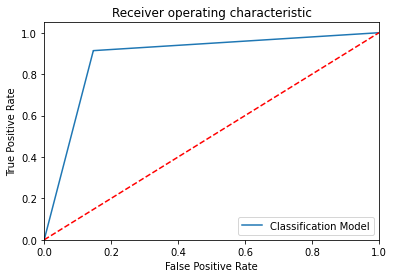

-----------------------------------------------------------------------------------------------------
Model Name:  RandomForestClassifier()
Confusion matrix : 
 [[7108  301]
 [ 902 6533]]
Outcome values : 
 7108 301 902 6533
Classification report : 
               precision    recall  f1-score   support

           1       0.89      0.96      0.92      7409
           0       0.96      0.88      0.92      7435

    accuracy                           0.92     14844
   macro avg       0.92      0.92      0.92     14844
weighted avg       0.92      0.92      0.92     14844

Accuracy : 91.9 %
Precision : 88.7 %
Recall : 95.9 %
F1 Score : 0.922
Specificity or True Negative Rate : 87.9 %
Balanced Accuracy : 91.9 %
MCC : 0.841
roc_auc_score: 0.919


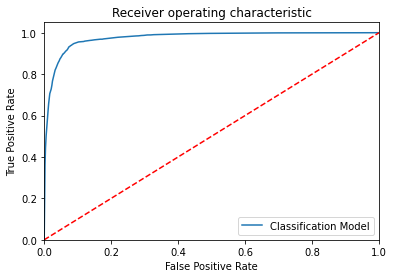

-----------------------------------------------------------------------------------------------------
Model Name:  ExtraTreesClassifier()
Confusion matrix : 
 [[7161  248]
 [ 772 6663]]
Outcome values : 
 7161 248 772 6663
Classification report : 
               precision    recall  f1-score   support

           1       0.90      0.97      0.93      7409
           0       0.96      0.90      0.93      7435

    accuracy                           0.93     14844
   macro avg       0.93      0.93      0.93     14844
weighted avg       0.93      0.93      0.93     14844

Accuracy : 93.1 %
Precision : 90.3 %
Recall : 96.7 %
F1 Score : 0.934
Specificity or True Negative Rate : 89.6 %
Balanced Accuracy : 93.2 %
MCC : 0.865
roc_auc_score: 0.931


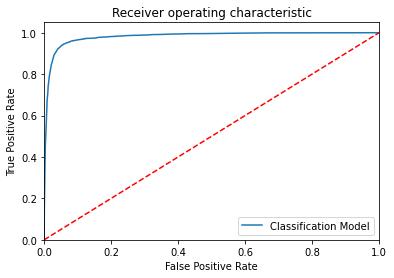

-----------------------------------------------------------------------------------------------------
Model Name:  KNeighborsClassifier()
Confusion matrix : 
 [[6613  796]
 [1691 5744]]
Outcome values : 
 6613 796 1691 5744
Classification report : 
               precision    recall  f1-score   support

           1       0.80      0.89      0.84      7409
           0       0.88      0.77      0.82      7435

    accuracy                           0.83     14844
   macro avg       0.84      0.83      0.83     14844
weighted avg       0.84      0.83      0.83     14844

Accuracy : 83.2 %
Precision : 79.6 %
Recall : 89.3 %
F1 Score : 0.842
Specificity or True Negative Rate : 77.3 %
Balanced Accuracy : 83.3 %
MCC : 0.67
roc_auc_score: 0.833


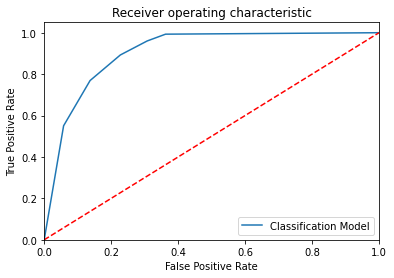

-----------------------------------------------------------------------------------------------------
Model Name:  SVC(probability=True)
Confusion matrix : 
 [[6538  871]
 [1786 5649]]
Outcome values : 
 6538 871 1786 5649
Classification report : 
               precision    recall  f1-score   support

           1       0.79      0.88      0.83      7409
           0       0.87      0.76      0.81      7435

    accuracy                           0.82     14844
   macro avg       0.83      0.82      0.82     14844
weighted avg       0.83      0.82      0.82     14844

Accuracy : 82.1 %
Precision : 78.5 %
Recall : 88.2 %
F1 Score : 0.831
Specificity or True Negative Rate : 76.0 %
Balanced Accuracy : 82.1 %
MCC : 0.647
roc_auc_score: 0.821


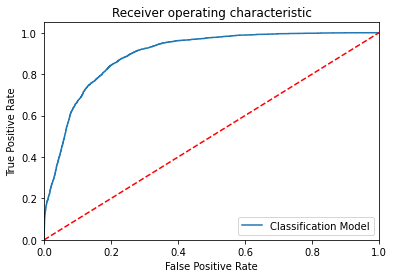

-----------------------------------------------------------------------------------------------------
Model Name:  BaggingClassifier(n_estimators=100)
Confusion matrix : 
 [[7076  333]
 [ 964 6471]]
Outcome values : 
 7076 333 964 6471
Classification report : 
               precision    recall  f1-score   support

           1       0.88      0.96      0.92      7409
           0       0.95      0.87      0.91      7435

    accuracy                           0.91     14844
   macro avg       0.92      0.91      0.91     14844
weighted avg       0.92      0.91      0.91     14844

Accuracy : 91.3 %
Precision : 88.0 %
Recall : 95.5 %
F1 Score : 0.916
Specificity or True Negative Rate : 87.0 %
Balanced Accuracy : 91.2 %
MCC : 0.828
roc_auc_score: 0.913


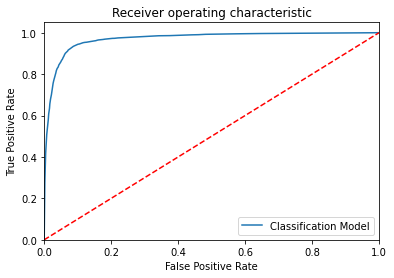

-----------------------------------------------------------------------------------------------------
Model Name:  XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='mlogloss', gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_to_onehot=4, max_delta_step=0, max_depth=3,
              max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
Confusion matrix : 
 [[6247 1162]
 [1456 5979]]
Outcome values : 
 6247 1162 1456 5979
Classification report : 
               precision    recall  f1-score   support

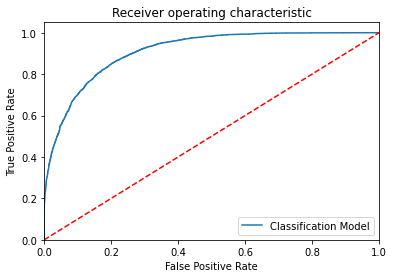

-----------------------------------------------------------------------------------------------------
Model Name:  GradientBoostingClassifier()
Confusion matrix : 
 [[6352 1057]
 [1466 5969]]
Outcome values : 
 6352 1057 1466 5969
Classification report : 
               precision    recall  f1-score   support

           1       0.81      0.86      0.83      7409
           0       0.85      0.80      0.83      7435

    accuracy                           0.83     14844
   macro avg       0.83      0.83      0.83     14844
weighted avg       0.83      0.83      0.83     14844

Accuracy : 83.0 %
Precision : 81.2 %
Recall : 85.7 %
F1 Score : 0.834
Specificity or True Negative Rate : 80.3 %
Balanced Accuracy : 83.0 %
MCC : 0.661
roc_auc_score: 0.83


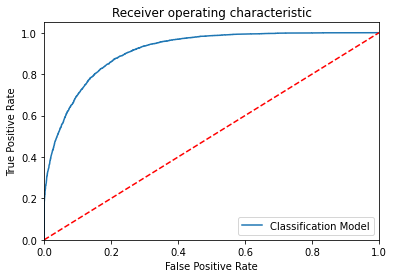

-----------------------------------------------------------------------------------------------------
Model Name:  LGBMClassifier()
Confusion matrix : 
 [[6407 1002]
 [1432 6003]]
Outcome values : 
 6407 1002 1432 6003
Classification report : 
               precision    recall  f1-score   support

           1       0.82      0.86      0.84      7409
           0       0.86      0.81      0.83      7435

    accuracy                           0.84     14844
   macro avg       0.84      0.84      0.84     14844
weighted avg       0.84      0.84      0.84     14844

Accuracy : 83.6 %
Precision : 81.7 %
Recall : 86.5 %
F1 Score : 0.84
Specificity or True Negative Rate : 80.7 %
Balanced Accuracy : 83.6 %
MCC : 0.673
roc_auc_score: 0.836


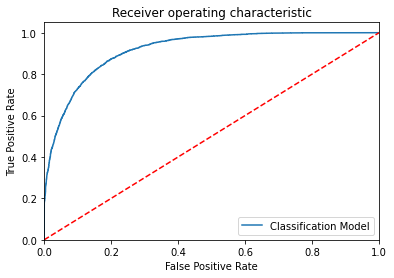

-----------------------------------------------------------------------------------------------------
Model Name:  GaussianNB()
Confusion matrix : 
 [[2788 4621]
 [ 315 7120]]
Outcome values : 
 2788 4621 315 7120
Classification report : 
               precision    recall  f1-score   support

           1       0.90      0.38      0.53      7409
           0       0.61      0.96      0.74      7435

    accuracy                           0.67     14844
   macro avg       0.75      0.67      0.64     14844
weighted avg       0.75      0.67      0.64     14844

Accuracy : 66.7 %
Precision : 89.8 %
Recall : 37.6 %
F1 Score : 0.53
Specificity or True Negative Rate : 95.8 %
Balanced Accuracy : 66.7 %
MCC : 0.411
roc_auc_score: 0.667


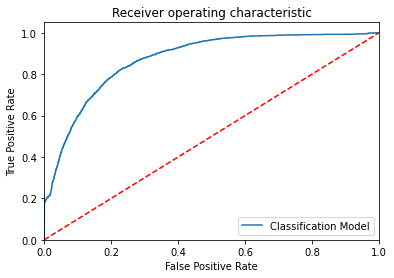

-----------------------------------------------------------------------------------------------------


In [45]:
# Build the Calssification models and compare the results

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
import lightgbm as lgb

# Create objects of classification algorithm with default hyper-parameters

ModelLR = LogisticRegression()
ModelDC = DecisionTreeClassifier()
ModelRF = RandomForestClassifier()
ModelET = ExtraTreesClassifier()
ModelKNN = KNeighborsClassifier(n_neighbors=5)
ModelSVM = SVC(probability=True)
modelBAG = BaggingClassifier(base_estimator=None, n_estimators=100, max_samples=1.0, max_features=1.0,
                             bootstrap=True, bootstrap_features=False, oob_score=False, warm_start=False,
                             n_jobs=None, random_state=None, verbose=0)
modelXGB = XGBClassifier(n_estimators=100, max_depth=3, eval_metric='mlogloss')
ModelGB = GradientBoostingClassifier()
ModelLGB = lgb.LGBMClassifier()
ModelGNB = GaussianNB()

# Evalution matrix for all the algorithms

MM = [ModelLR, ModelDC, ModelRF, ModelET, ModelKNN, ModelSVM, modelBAG,modelXGB, ModelGB, ModelLGB, ModelGNB]
for models in MM:
    
    # Fit the model
    
    models.fit(x_train,y_train)
    
    # Prediction
    
    y_pred = models.predict(x_test)
    y_pred_prob = models.predict_proba(x_test)
    
    # Print the model name
    
    print('Model Name: ', models)
    
    # confusion matrix in sklearn

    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report

    # actual values

    actual = y_test

    # predicted values

    predicted = y_pred

    # confusion matrix

    matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
    print('Confusion matrix : \n', matrix)

    # outcome values order in sklearn

    tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
    print('Outcome values : \n', tp, fn, fp, tn)

    # classification report for precision, recall f1-score and accuracy

    C_Report = classification_report(actual,predicted,labels=[1,0])

    print('Classification report : \n', C_Report)

    # calculating the metrics

    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);

    # Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
    # A model with a score of +1 is a perfect model and -1 is a poor model

    from math import sqrt

    mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

    print('Accuracy :', round(accuracy*100, 2),'%')
    print('Precision :', round(precision*100, 2),'%')
    print('Recall :', round(sensitivity*100,2), '%')
    print('F1 Score :', f1Score)
    print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
    print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
    print('MCC :', MCC)

    # Area under ROC curve 

    from sklearn.metrics import roc_curve, roc_auc_score

    print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))
    
    # ROC Curve
    
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve
    logit_roc_auc = roc_auc_score(actual, predicted)
    fpr, tpr, thresholds = roc_curve(actual, models.predict_proba(x_test)[:,1])
    plt.figure()
    # plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
    plt.plot(fpr, tpr, label= 'Classification Model' % logit_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()
    print('-----------------------------------------------------------------------------------------------------')
    #----------------------------------------------------------------------------------------------------------
    new_row = ({'Model Name' :models,
               'True_Positive' : tp, 
               'False_Negative' :fn, 
               'False_Positive' :fp,
               'True_Negative' :tn,
               'Accuracy' :accuracy,
               'Precision' :precision,
               'Recall' : sensitivity,
               'F1 Score' :f1Score,
               'Specificity' :specificity,
               'MCC':MCC,
               'ROC_AUC_Score':roc_auc_score(actual, predicted),
               'Balanced Accuracy':balanced_accuracy})
    CSResults = CSResults.append(new_row, ignore_index=True)
    #----------------------------------------------------------------------------------------------------------

In [46]:
CSResults

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy
0,LogisticRegression(),5602.0,1807.0,1810.0,5625.0,0.756,0.756,0.756,0.756,0.757,0.513,0.756332,0.756
1,DecisionTreeClassifier(),6768.0,641.0,1092.0,6343.0,0.883,0.861,0.913,0.887,0.853,0.768,0.883305,0.883
2,"(DecisionTreeClassifier(max_features='sqrt', r...",7108.0,301.0,902.0,6533.0,0.919,0.887,0.959,0.922,0.879,0.841,0.919028,0.919
3,"(ExtraTreeClassifier(random_state=320019314), ...",7161.0,248.0,772.0,6663.0,0.931,0.903,0.967,0.934,0.896,0.865,0.931347,0.932
4,KNeighborsClassifier(),6613.0,796.0,1691.0,5744.0,0.832,0.796,0.893,0.842,0.773,0.670,0.832563,0.833
5,SVC(probability=True),6538.0,871.0,1786.0,5649.0,0.821,0.785,0.882,0.831,0.760,0.647,0.821113,0.821
6,(DecisionTreeClassifier(random_state=205441900...,7076.0,333.0,964.0,6471.0,0.913,0.880,0.955,0.916,0.870,0.828,0.912699,0.912
7,"XGBClassifier(base_score=0.5, booster='gbtree'...",6247.0,1162.0,1456.0,5979.0,0.824,0.811,0.843,0.827,0.804,0.648,0.823667,0.824
8,([DecisionTreeRegressor(criterion='friedman_ms...,6352.0,1057.0,1466.0,5969.0,0.830,0.812,0.857,0.834,0.803,0.661,0.830080,0.830
9,LGBMClassifier(),6407.0,1002.0,1432.0,6003.0,0.836,0.817,0.865,0.840,0.807,0.673,0.836078,0.836


In [54]:
# Load the Hyperparameter tunining result dataset

HTResults = pd.read_csv(r"C:\Users\Rashee\OneDrive - SRKR Engineering College\drive\OneDrive - SRKR Engineering College\Desktop\AI\CSResults1.csv", header=0)
HTResults.head()

,Model Name,True Positive,False Negative,False Positive,True Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy


In [82]:
# Hyperparameter tuning using RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)] # number of trees in the random forest 
max_features = ['auto', 'sqrt', 'log2'] # number of features in consideration at every split
max_depth = [int(x) for x in np.linspace(10, 120, num = 12)] # maximum number of levels allowed in each decision tree
min_samples_split = [2, 6, 10] # minimum sample number to split a node
min_samples_leaf = [1, 3, 4] # minimum sample number that can be stored in a leaf node
bootstrap = [True, False] # method used to sample data points

random_grid = {'n_estimators': n_estimators,

'max_features': max_features,

'max_depth': max_depth,

'min_samples_split': min_samples_split,

'min_samples_leaf': min_samples_leaf,

'bootstrap': bootstrap}

In [83]:
# Importing Random Forest Classifier from the sklearn.ensemble

from sklearn.ensemble import RandomForestClassifier

ModelRF4 = RandomForestClassifier()

from sklearn.model_selection import RandomizedSearchCV

rf_random = RandomizedSearchCV(estimator = ModelRF4,param_distributions = random_grid,
                               n_iter = 100, cv = 3, verbose=2, random_state=35, n_jobs = -1)

# Fit the model with train data

rf_random.fit(x_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      120],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 3, 4],
                                        'min_samples_split': [2, 6, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=35, verbose=2)

In [84]:
best_grid = rf_random.best_estimator_
best_grid

RandomForestClassifier(bootstrap=False, max_depth=70, max_features='auto',
                       n_estimators=1000)

Confusion matrix : 
 [[6925  539]
 [1095 6285]]
Outcome values : 
 6925 539 1095 6285
Classification report : 
               precision    recall  f1-score   support

           1       0.86      0.93      0.89      7464
           0       0.92      0.85      0.88      7380

    accuracy                           0.89     14844
   macro avg       0.89      0.89      0.89     14844
weighted avg       0.89      0.89      0.89     14844

Accuracy : 89.0 %
Precision : 86.3 %
Recall : 92.8 %
F1 Score : 0.894
Specificity or True Negative Rate : 85.2 %
Balanced Accuracy : 89.0 %
MCC : 0.782
roc_auc_score: 0.89


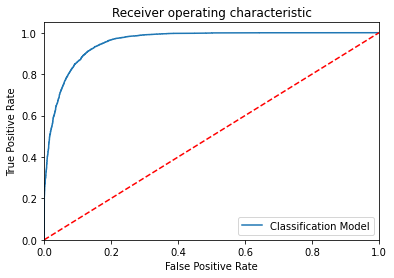

-----------------------------------------------------------------------------------------------------


In [99]:
# To build the 'RandomForestClassifier' model with random sampling with Hyperparametr tuning with RandomizedSearchCV

from sklearn.ensemble import RandomForestClassifier

ModelRF5 = RandomForestClassifier(n_estimators=1000, criterion='gini', max_depth=70, min_samples_split=6,
                                  min_samples_leaf=4, min_weight_fraction_leaf=0.0, max_features='auto', 
                                  max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=False, oob_score=False, 
                                  n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, 
                                  ccp_alpha=0.0, max_samples=None)

# Train the model with train data 

ModelRF5.fit(x_train,y_train)

# Predict the model with test data set

y_pred = ModelRF5.predict(x_test)
y_pred_prob = ModelRF5.predict_proba(x_test)

# Confusion matrix in sklearn

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# actual values

actual = y_test

# predicted values

predicted = y_pred

# confusion matrix

matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
print('Confusion matrix : \n', matrix)

# outcome values order in sklearn

tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy

C_Report = classification_report(actual,predicted,labels=[1,0])

print('Classification report : \n', C_Report)

# calculating the metrics

sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);

# Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)

# Area under ROC curve 

from sklearn.metrics import roc_curve, roc_auc_score

print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))

# ROC Curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(actual, predicted)
fpr, tpr, thresholds = roc_curve(actual, ModelRF5.predict_proba(x_test)[:,1])
plt.figure()
# plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot(fpr, tpr, label= 'Classification Model' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show() 
print('-----------------------------------------------------------------------------------------------------')
#----------------------------------------------------------------------------------------------------------
new_row = {'Model Name' : ModelRF5,
           'True_Positive': tp,
           'False_Negative': fn, 
           'False_Positive': fp, 
           'True_Negative': tn,
           'Accuracy' : accuracy,
           'Precision' : precision,
           'Recall' : sensitivity,
           'F1 Score' : f1Score,
           'Specificity' : specificity,
           'MCC':MCC,
           'ROC_AUC_Score':roc_auc_score(actual, predicted),
           'Balanced Accuracy':balanced_accuracy}
HTResults = HTResults.append(new_row, ignore_index=True)
#----------------------------------------------------------------------------------------------------------

In [86]:
# Hyperparameter tuning by GridSearchCV

from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search 
GS_grid = {
    'bootstrap': [True, False],
    'max_depth': [10,15],
    'max_features': ['auto', 'sqrt', 'log2'],
    'min_samples_leaf': [3, 4, 5, 6],
    'min_samples_split': [3,4,5,6],
    'n_estimators': [100, 200, 300, 400, 500]
}

# Create object for model

ModelRF2 = RandomForestClassifier()

# Instantiate the grid search model

Grid_search = GridSearchCV(estimator = ModelRF2, param_grid = GS_grid, cv = 3, n_jobs = -1, verbose = 2)

# Fit the grid search to the data

Grid_search.fit(x_train,y_train)

Fitting 3 folds for each of 960 candidates, totalling 2880 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False], 'max_depth': [10, 15],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [3, 4, 5, 6],
                         'min_samples_split': [3, 4, 5, 6],
                         'n_estimators': [100, 200, 300, 400, 500]},
             verbose=2)

In [87]:

# Best parameter from gridseachCV
Grid_search.best_params_

{'bootstrap': False,
 'max_depth': 15,
 'max_features': 'log2',
 'min_samples_leaf': 3,
 'min_samples_split': 4,
 'n_estimators': 500}

In [88]:
# Display of best parameter

best_grid = Grid_search.best_estimator_
best_grid

RandomForestClassifier(bootstrap=False, max_depth=15, max_features='log2',
                       min_samples_leaf=3, min_samples_split=4,
                       n_estimators=500)

Confusion matrix : 
 [[6740  724]
 [1598 5782]]
Outcome values : 
 6740 724 1598 5782
Classification report : 
               precision    recall  f1-score   support

           1       0.81      0.90      0.85      7464
           0       0.89      0.78      0.83      7380

    accuracy                           0.84     14844
   macro avg       0.85      0.84      0.84     14844
weighted avg       0.85      0.84      0.84     14844

Accuracy : 84.4 %
Precision : 80.8 %
Recall : 90.3 %
F1 Score : 0.853
Specificity or True Negative Rate : 78.3 %
Balanced Accuracy : 84.3 %
MCC : 0.692
roc_auc_score: 0.843


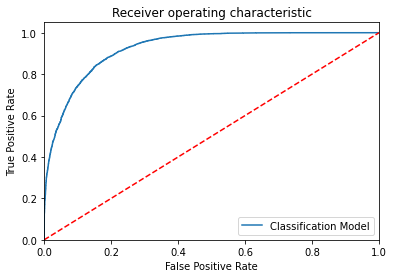

-----------------------------------------------------------------------------------------------------


In [98]:
# To build the 'ExtraTreesClassifier' model with random sampling with Hyperparameter tuning with GridSearchCV

from sklearn.ensemble import ExtraTreesClassifier

ModelET = ExtraTreesClassifier(bootstrap=False, max_depth=15, max_features='log2',
                       min_samples_leaf=3, min_samples_split=4,
                       n_estimators=500)

# Train the model with train data

ModelET.fit(x_train,y_train)

# Predict the model with test data set

y_pred = ModelET.predict(x_test)
y_pred_prob = ModelET.predict_proba(x_test)

# Confusion matrix in sklearn

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# actual values

actual = y_test

# predicted values

predicted = y_pred

# confusion matrix

matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
print('Confusion matrix : \n', matrix)

# outcome values order in sklearn

tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy

C_Report = classification_report(actual,predicted,labels=[1,0])

print('Classification report : \n', C_Report)

# calculating the metrics

sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);

# Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)

# Area under ROC curve 

from sklearn.metrics import roc_curve, roc_auc_score

print('roc_auc_score:', round(roc_auc_score(y_test, y_pred), 3))

# ROC Curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test,ModelET.predict_proba(x_test)[:,1])
plt.figure()
# plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot(fpr, tpr, label= 'Classification Model' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show() 
print('-----------------------------------------------------------------------------------------------------')
#----------------------------------------------------------------------------------------------------------
new_row = {'Model Name' : ModelET,
           'True_Positive': tp,
           'False_Negative': fn, 
           'False_Positive': fp, 
           'True_Negative': tn,
           'Accuracy' : accuracy,
           'Precision' : precision,
           'Recall' : sensitivity,
           'F1 Score' : f1Score,
           'Specificity' : specificity,
           'MCC':MCC,
           'ROC_AUC_Score':roc_auc_score(y_test, y_pred),
           'Balanced Accuracy':balanced_accuracy}
HTResults = HTResults.append(new_row, ignore_index=True)
#----------------------------------------------------------------------------------------------------------

In [100]:
HTResults

,Model Name,KNN K Value,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy
0,"(ExtraTreeClassifier(max_depth=15, max_feature...",NaN,6740,724,1598,5782,0.844,0.808,0.903,0.853,0.783,0.692,0.843235,0.843
1,"(DecisionTreeClassifier(max_depth=70, max_feat...",NaN,6925,539,1095,6285,0.89,0.863,0.928,0.894,0.852,0.782,0.889706,0.89


In [49]:
# Hyperparameter tuning using RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)] # number of trees in the random forest 
max_features = ['auto', 'sqrt', 'log2'] # number of features in consideration at every split
max_depth = [int(x) for x in np.linspace(10, 120, num = 12)] # maximum number of levels allowed in each decision tree
min_samples_split = [2, 6, 10] # minimum sample number to split a node
min_samples_leaf = [1, 3, 4] # minimum sample number that can be stored in a leaf node
bootstrap = [True, False] # method used to sample data points

random_grid = {'n_estimators': n_estimators,

'max_features': max_features,

'max_depth': max_depth,

'min_samples_split': min_samples_split,

'min_samples_leaf': min_samples_leaf,

'bootstrap': bootstrap}

In [50]:
# Importing Random Forest Classifier from the sklearn.ensemble

from sklearn.ensemble import RandomForestClassifier

ModelRF4 = RandomForestClassifier()

from sklearn.model_selection import RandomizedSearchCV

rf_random = RandomizedSearchCV(estimator = ModelRF4,param_distributions = random_grid,
                               n_iter = 100, cv = 3, verbose=2, random_state=35, n_jobs = -1)

# Fit the model with train data

rf_random.fit(x_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      120],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 3, 4],
                                        'min_samples_split': [2, 6, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=35, verbose=2)

In [52]:
# Print the best parameters

print ('Random grid: ', random_grid, '\n')

# print the best parameters

print ('Best Parameters: ', rf_random.best_params_, ' \n')

Random grid:  {'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120], 'min_samples_split': [2, 6, 10], 'min_samples_leaf': [1, 3, 4], 'bootstrap': [True, False]} 

Best Parameters:  {'n_estimators': 1600, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 60, 'bootstrap': False}  



Confusion matrix : 
 [[7074  335]
 [ 736 6699]]
Outcome values : 
 7074 335 736 6699
Classification report : 
               precision    recall  f1-score   support

           1       0.91      0.95      0.93      7409
           0       0.95      0.90      0.93      7435

    accuracy                           0.93     14844
   macro avg       0.93      0.93      0.93     14844
weighted avg       0.93      0.93      0.93     14844

Accuracy : 92.8 %
Precision : 90.6 %
Recall : 95.5 %
F1 Score : 0.93
Specificity or True Negative Rate : 90.1 %
Balanced Accuracy : 92.8 %
MCC : 0.857
roc_auc_score: 0.928


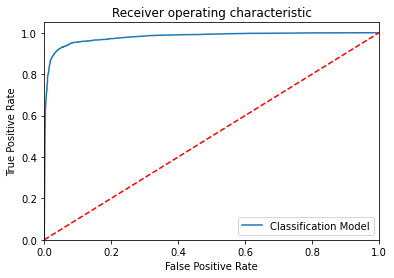

-----------------------------------------------------------------------------------------------------


In [58]:
# To build the 'RandomForestClassifier' model with random sampling with Hyperparametr tuning with RandomizedSearchCV

from sklearn.ensemble import RandomForestClassifier

ModelRF5 = RandomForestClassifier(n_estimators= 1600, min_samples_split= 2,
                                  min_samples_leaf=1, max_features='sqrt',
                                  max_depth=60, bootstrap= False)

# Train the model with train data 

ModelRF5.fit(x_train,y_train)

# Predict the model with test data set

y_pred = ModelRF5.predict(x_test)
y_pred_prob = ModelRF5.predict_proba(x_test)

# Confusion matrix in sklearn

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# actual values

actual = y_test

# predicted values

predicted = y_pred

# confusion matrix

matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
print('Confusion matrix : \n', matrix)

# outcome values order in sklearn

tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy

C_Report = classification_report(actual,predicted,labels=[1,0])

print('Classification report : \n', C_Report)

# calculating the metrics

sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);

# Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)

# Area under ROC curve 

from sklearn.metrics import roc_curve, roc_auc_score

print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))

# ROC Curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(actual, predicted)
fpr, tpr, thresholds = roc_curve(actual, ModelRF5.predict_proba(x_test)[:,1])
plt.figure()
# plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot(fpr, tpr, label= 'Classification Model' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show() 
print('-----------------------------------------------------------------------------------------------------')
#----------------------------------------------------------------------------------------------------------
new_row = {'Model Name' : ModelRF5,
           'True_Positive': tp,
           'False_Negative': fn, 
           'False_Positive': fp, 
           'True_Negative': tn,
           'Accuracy' : accuracy,
           'Precision' : precision,
           'Recall' : sensitivity,
           'F1 Score' : f1Score,
           'Specificity' : specificity,
           'MCC':MCC,
           'ROC_AUC_Score':roc_auc_score(actual, predicted),
           'Balanced Accuracy':balanced_accuracy}
HTResults = HTResults.append(new_row, ignore_index=True)
#----------------------------------------------------------------------------------------------------------

In [64]:
#Setting values for the parameters
n_estimators = [100, 300, 500, 800, 1200]
#max_depth = [5, 10, 15, 25, 30]
max_samples = [5, 10, 25, 50, 100]
max_features = [1, 2, 5, 10, 13]
from sklearn.model_selection import RandomizedSearchCV

#Creating a dictionary for the hyper parameters
hyperbag = dict(n_estimators = n_estimators, max_samples = max_samples, 
              max_features = max_features)

#Applying RandomizedSearchCV to get the best value for hyperparameters
Randombag = RandomizedSearchCV(BaggingClassifier(),hyperbag, cv = 3, verbose = 1, n_jobs = -1)
Randombag.fit(x_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=BaggingClassifier(), n_jobs=-1,
                   param_distributions={'max_features': [1, 2, 5, 10, 13],
                                        'max_samples': [5, 10, 25, 50, 100],
                                        'n_estimators': [100, 300, 500, 800,
                                                         1200]},
                   verbose=1)

In [65]:
#Printing the best hyperparameters
print('The best hyper parameters are:\n',Randombag.best_params_)

The best hyper parameters are:
 {'n_estimators': 1200, 'max_samples': 100, 'max_features': 1}


In [66]:
#Fitting the bagging model with the best hyper parameters obtained through GridSearchCV
bagg1 = BaggingClassifier(max_features=1, max_samples=100,n_estimators= 1200)
bagg1.fit(x_train,y_train)
pred_bagg1 = bagg1.predict(x_test)

In [70]:
#Checking different metrics for bagging model after tuning the hyperparameters
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
print('Checking different metrics for bagging model after tuning the hyperparameters:\n')
print("Training accuracy: ",bagg1.score(x_train,y_train))
acc_score = accuracy_score(y_test, pred_bagg1)
print('Testing accuracy: ',acc_score)
conf_mat = confusion_matrix(y_test, pred_bagg1)
print('Confusion Matrix: \n',conf_mat)
roc_auc = roc_auc_score(y_test,pred_bagg1)
print('ROC AUC score: ',roc_auc)
class_rep2 = classification_report(y_test,pred_bagg1)
print('Classification Report: \n',class_rep2)

Checking different metrics for bagging model after tuning the hyperparameters:

Training accuracy:  0.8094051067843427
Testing accuracy:  0.8084074373484236
Confusion Matrix: 
 [[5489 1946]
 [ 898 6511]]
ROC AUC score:  0.8085305109300625
Classification Report: 
               precision    recall  f1-score   support

           0       0.86      0.74      0.79      7435
           1       0.77      0.88      0.82      7409

    accuracy                           0.81     14844
   macro avg       0.81      0.81      0.81     14844
weighted avg       0.81      0.81      0.81     14844



In [71]:
y_pred=ModelET.predict(x_test)

In [72]:
y_pred

array([1, 0, 0, ..., 0, 0, 0])

In [74]:
import pandas as pd
Results=pd.DataFrame({'salary_actual':y_test,'salary_predict':y_pred})
ResultsFinal=adult_inc_bk.merge(Results,left_index=True,right_index=True)
ResultsFinal.sample(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,salary_actual,salary_predict
27536,30,Private,84119,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,2051,40,United-States,<=50K,1,1
10672,39,Local-gov,20308,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,>50K,0,0
22509,24,Private,336088,HS-grad,9,Divorced,Exec-managerial,Not-in-family,Amer-Indian-Eskimo,Female,0,0,50,United-States,<=50K,0,0
23701,42,Private,198096,Some-college,10,Married-civ-spouse,Other-service,Husband,White,Male,0,0,40,United-States,>50K,0,0
4391,57,Private,367334,HS-grad,9,Separated,Sales,Unmarried,White,Female,0,0,40,United-States,<=50K,0,0
26813,54,Private,101890,HS-grad,9,Widowed,Sales,Unmarried,White,Female,0,0,40,United-States,<=50K,0,0
42728,23,Private,69847,Bachelors,13,Never-married,Prof-specialty,Own-child,Asian-Pac-Islander,Female,0,0,20,United-States,<=50K,0,0
46558,33,?,369386,Some-college,10,Married-civ-spouse,?,Wife,White,Female,5178,0,40,United-States,>50K,0,0
12319,32,Private,240763,11th,7,Divorced,Transport-moving,Own-child,Black,Male,0,0,45,United-States,<=50K,0,0
27697,38,Federal-gov,205852,HS-grad,9,Never-married,Adm-clerical,Not-in-family,White,Male,0,0,45,United-States,>50K,0,0


In [75]:
submission = pd.DataFrame({
    "salary" : y_pred
})
submission.head(10)

,salary
0,1
1,0
2,0
3,0
4,0
5,0
6,1
7,0
8,0
9,0


In [76]:
submission.to_csv(r"C:\00 DataScience\01-Internship\intern.csv", index = False)